# Sheet 3

### 3 Mutual Information for Image Matching

In [1]:
import numpy as np
from matplotlib import pyplot as plt

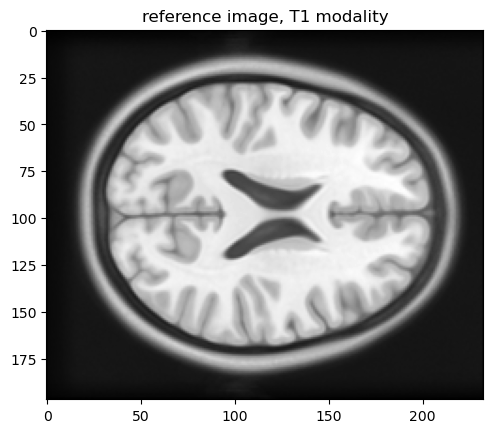

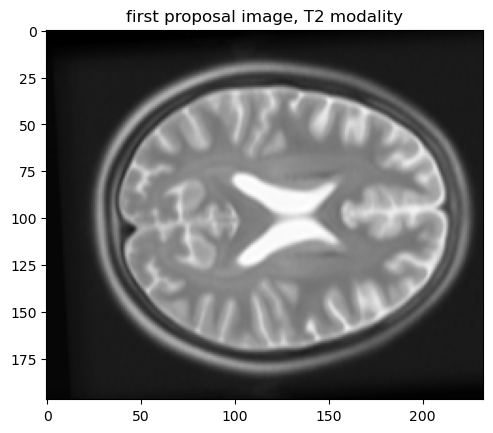

In [3]:
# load the reference image and the proposals
reference = np.load('data/t1_reference.npy')
proposals = np.load('data/t2_registration_proposals.npy')

plt.imshow(reference, cmap='gray')
plt.title('reference image, T1 modality')
plt.show();

plt.imshow(proposals[0], cmap='gray')
plt.title('first proposal image, T2 modality')
plt.show();

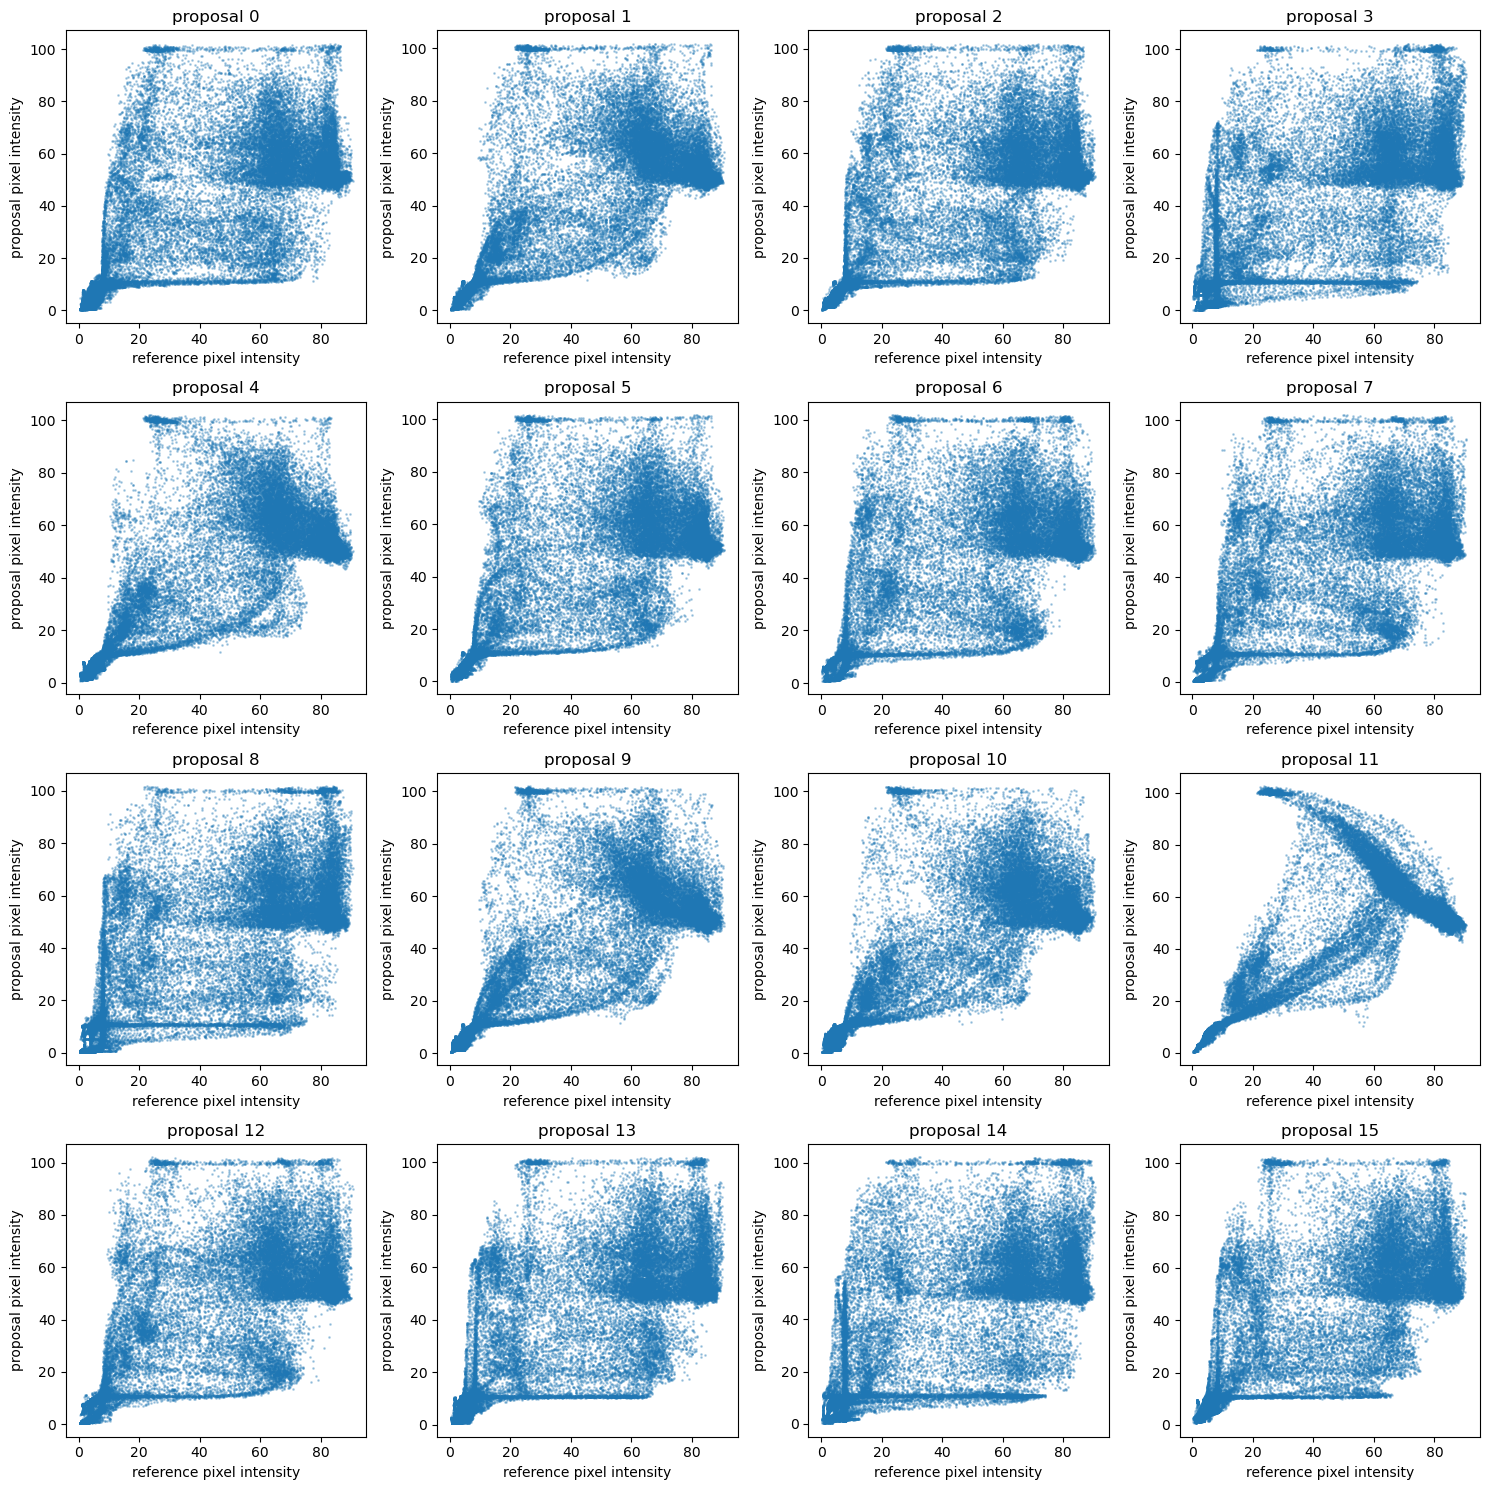

In [46]:
# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, proposal) in enumerate(zip(axs.flatten(), proposals)):
    # TODO: make a scatterplot of the reference pixel intensities vs the pixel intensities in the i-th proposal
    #       do not forget to label the axes
    ax.scatter(reference,proposal,s=1,alpha=0.3)
    ax.set_xlabel("reference pixel intensity")
    ax.set_ylabel("proposal pixel intensity")
    ax.set_title(f'proposal {i}')
plt.tight_layout()
plt.show();

Qualitative differences in reference and proposals:
 - We see that the both the images do not have sam intensities and the same respective pixel position. If this would have been the case all the points would have been along the diagonal of the plot.
 - From the spreadof the points we can see that at lower pixel values of reference image we have higher intensity at the correspoinding pixel in the proposal image and this is seen vice versa too. This explains the general inversion of intensity as seen in the plots in previous cell.
 - We also see an overdensity at the top right part of the graph, which shows that for high intensity values in the reference images, the pixels in the proposal image have almost a constant intensity lying between 60 to 40. It may also show misalignment of images
 - Both the images agree at exteremely low intensities which correspond to the pixels in the black background of the two images.

(b)

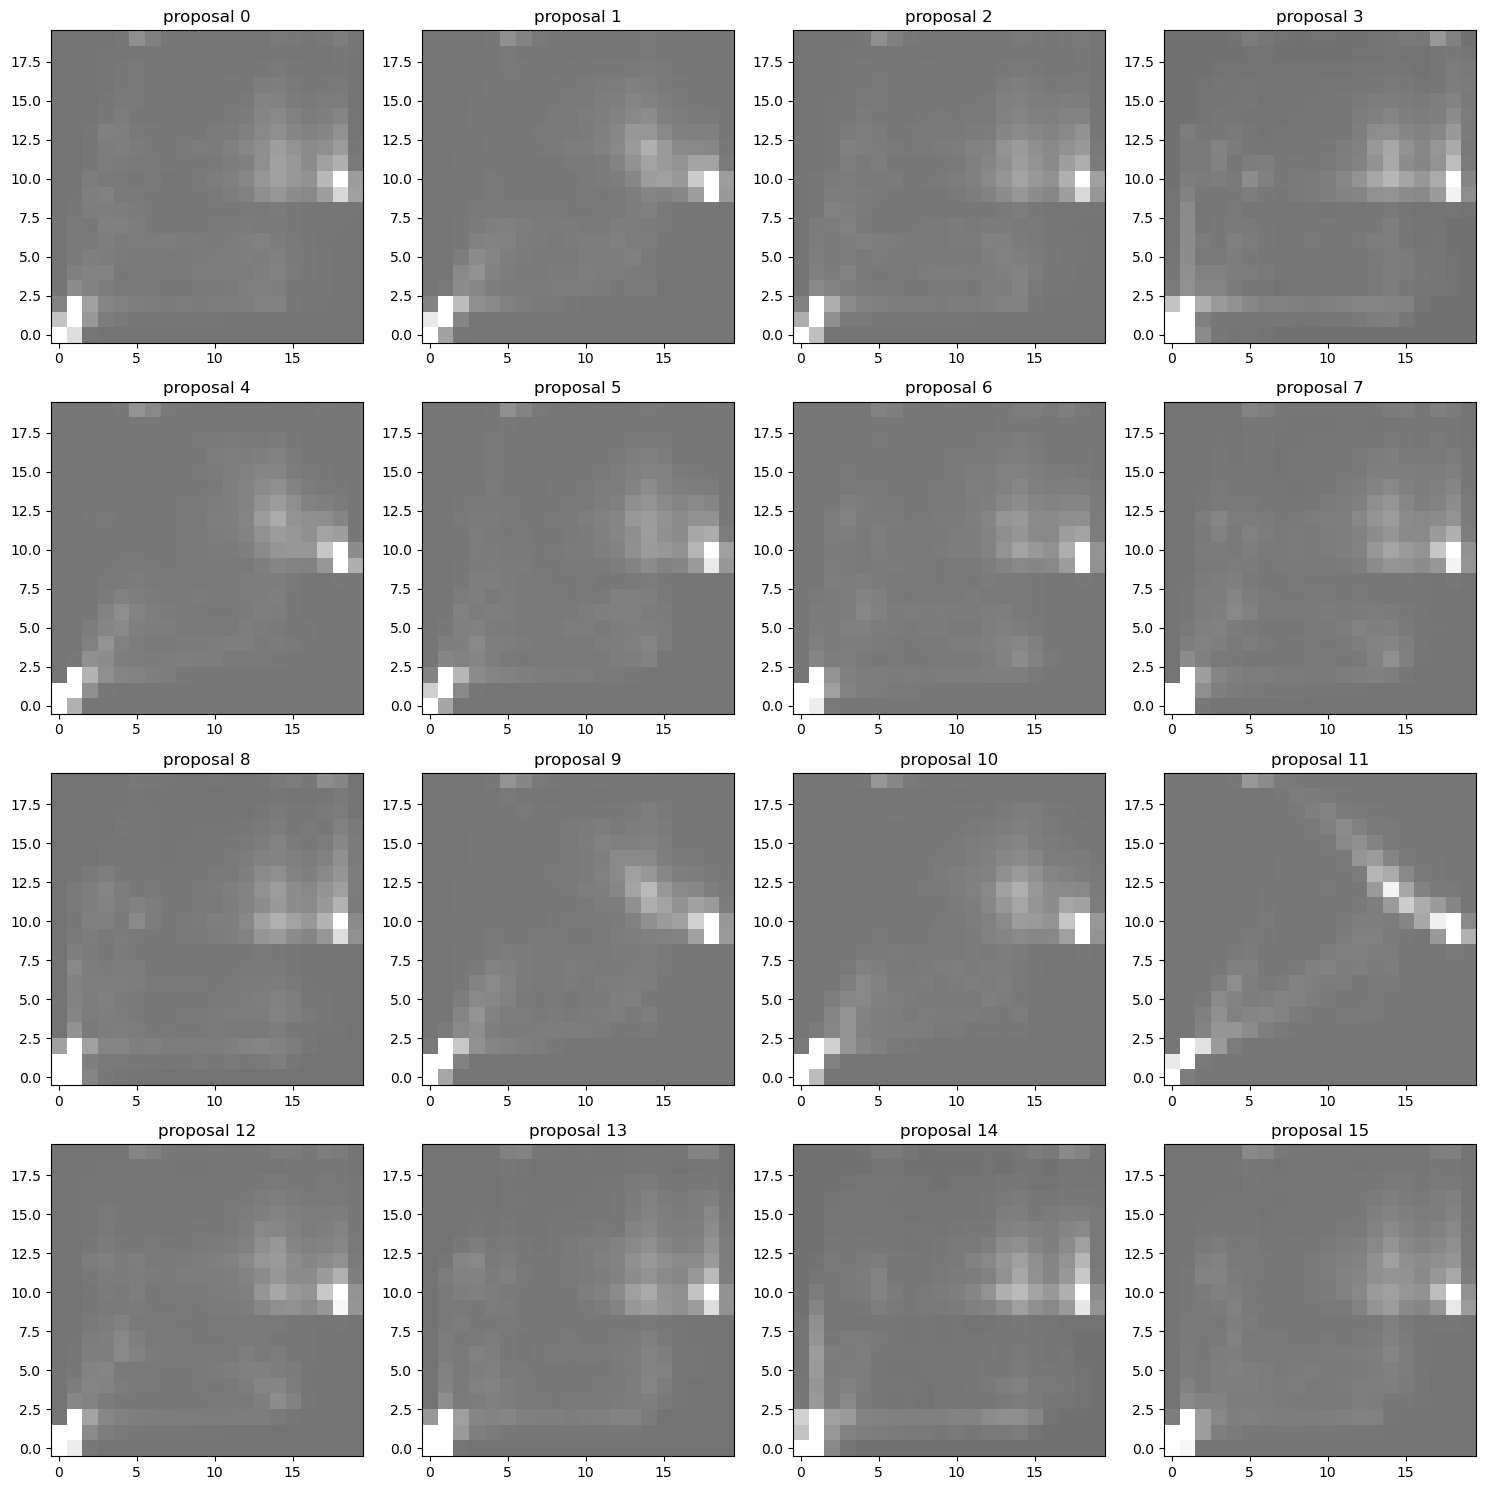

In [84]:
# TODO: For each proposal, create a 2D histograms of pixel intensities of it and the reference 
#       (Choose a sensible range and bins for the histogram)
# Hint: np.histogram2d, flatten the arrays as pixel positions don't matter

histograms = [np.histogram2d(reference.flatten(),proposal.flatten(),bins=20)[0] for proposal in proposals] 

# TODO: plot the histograms

# create 16 subplots in order to plot all proposals in one figure
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for i, (ax, hist) in enumerate(zip(axs.flatten(), histograms)):
    # TODO: plot the histogram for the i'th proposal. 
    mean = np.mean(hist.T)
    sigma = np.std(hist.T)
    ax.imshow(hist.T, origin='lower',vmax=mean+(3*sigma),vmin=mean-(3*sigma),cmap='gray')
    ax.set_title(f'proposal {i}')
    
plt.tight_layout()
plt.show();

In [73]:
from sklearn.metrics import mutual_info_score as mi

# TODO: for each histogram, compute the mutual information score
MI = np.array([mi(labels_true=reference,labels_pred=proposal,contingency=hist)for (hist,proposal) in zip(histograms,proposals)])
# TODO: order the proposal by MI, plot them in this order and include the scores in the titles of the plots.
sort_ind = np.argsort(MI)[::-1]



### Plotting from highest MI to lowest MI

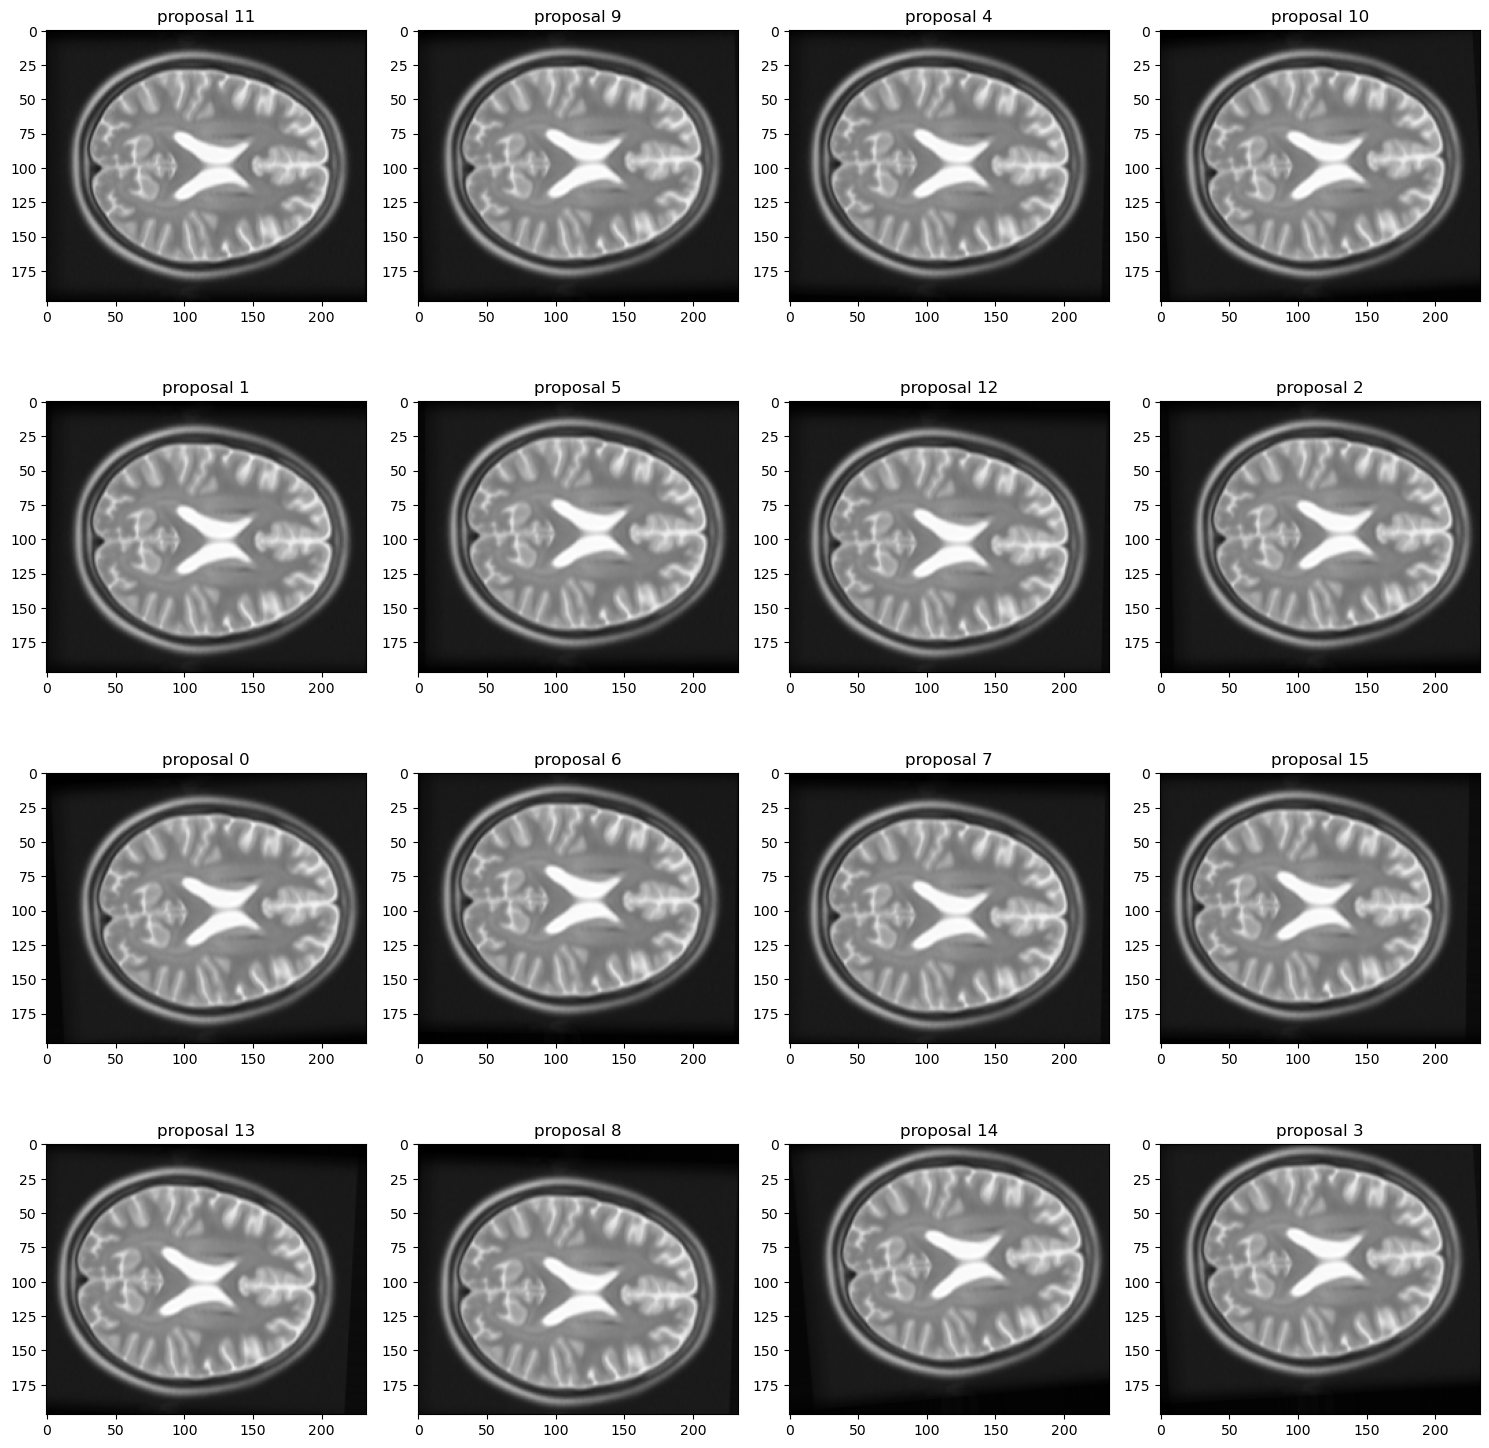

In [78]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for j, (ax, i) in enumerate(zip(axs.flatten(), sort_ind)):
    ax.imshow(proposals[i], cmap='gray')
    ax.set_title(f'proposal {i}')
    
plt.tight_layout()
plt.show();

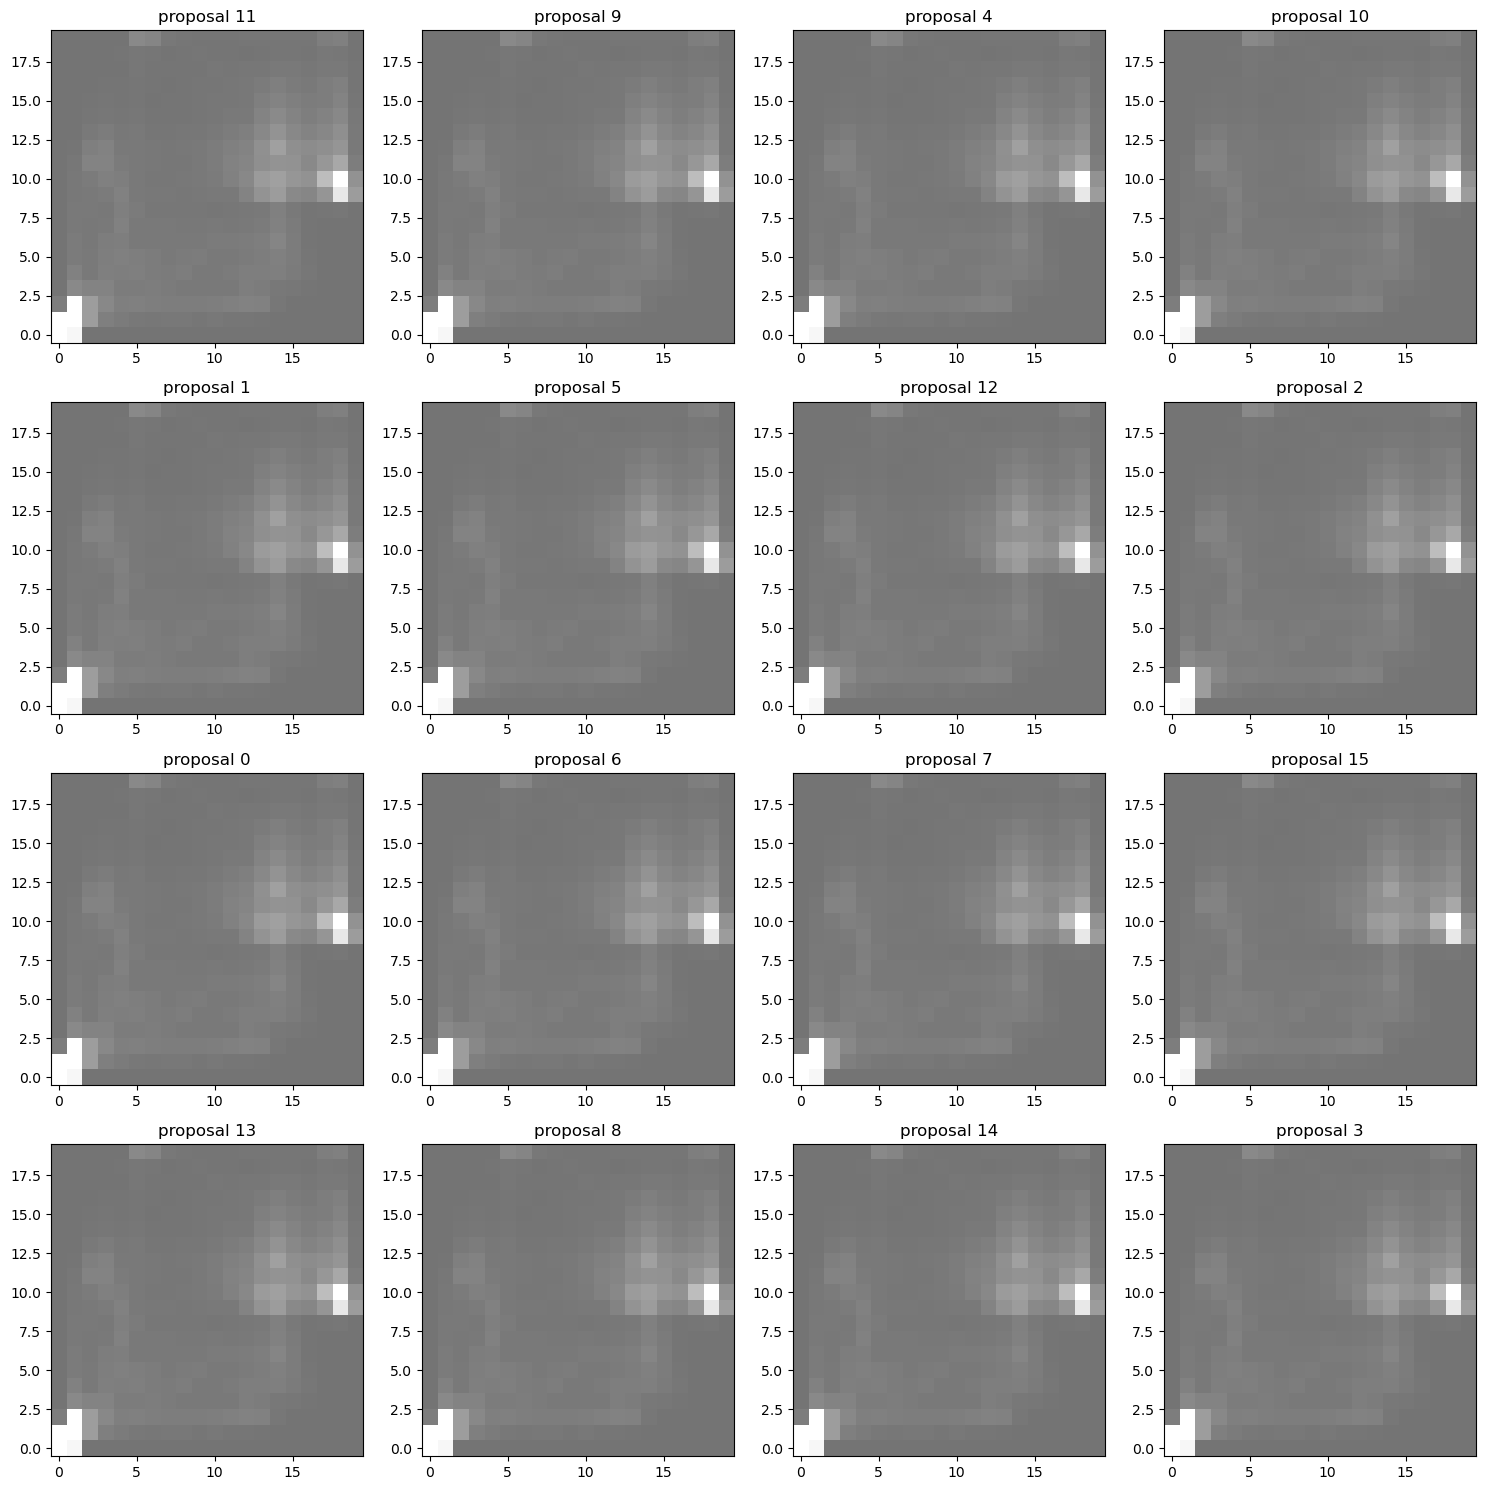

In [85]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15)) 

for j, (ax, i) in enumerate(zip(axs.flatten(), sort_ind)):
    mean = np.mean(hist.T)
    sigma = np.std(hist.T)
    ax.imshow(hist.T, origin='lower',vmax=mean+(3*sigma),vmin=mean-(3*sigma),cmap='gray')
    ax.set_title(f'proposal {i}')
    
plt.tight_layout()
plt.show();

We know that Mutual information is a metric from the joint (2D) histogram. The metric is high when the signal is highly concentrated in few bins, and low when the signal is spread across many bins as seen in proposal 11. We see that for the proposals with lower MI the signal is less concentrated into a small number of bins, leading to the drop in the mutual information.